<a href="https://colab.research.google.com/github/akashbejugam123/Hands-on-Assignment-2/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [27]:
data = pd.read_csv('Dataset.csv')

We'll add a new column to label house prices as >180k if they’re at or above $180,000 and <180k if they’re below.

In [28]:
data['median_house_value'].median()

179700.0

In [29]:
median = data['median_house_value'].median()
data['average'] = np.where(data['median_house_value'] > median, ">180k", "<180k")

In [30]:
data = data.drop(columns = ['ocean_proximity','longitude','latitude'])

In [32]:
print(data.isna().sum())

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
average                 0
dtype: int64


In [33]:
data = data.dropna()

In [34]:
x = data.drop(columns = ['median_house_value','average'])
y = data['average']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

**Decision tree Classification**

In [36]:
decisiontree = DecisionTreeClassifier(max_depth =3,random_state=42)
decisiontree.fit(x_train,y_train)
y_prediction = decisiontree.predict(x_test)

In [38]:
pred =pd.DataFrame({'Actual':y_test,'Predicted':y_prediction})
pred

,Actual,Predicted
14416,>180k,<180k
16383,<180k,>180k
7731,>180k,<180k
1410,>180k,<180k
1335,<180k,<180k
...,...,...
14148,<180k,<180k
14743,<180k,<180k
19496,<180k,<180k
20553,<180k,<180k


In [47]:
print("Accuracy:", accuracy_score(y_test,y_prediction))
print("Classification Report:\n",classification_report(y_test,y_prediction))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_prediction))

Accuracy: 0.7565081229203366
Classification Report:
               precision    recall  f1-score   support

       <180k       0.72      0.86      0.78      2594
       >180k       0.82      0.65      0.72      2515

    accuracy                           0.76      5109
   macro avg       0.77      0.75      0.75      5109
weighted avg       0.77      0.76      0.75      5109

Confusion Matrix:
 [[2232  362]
 [ 882 1633]]


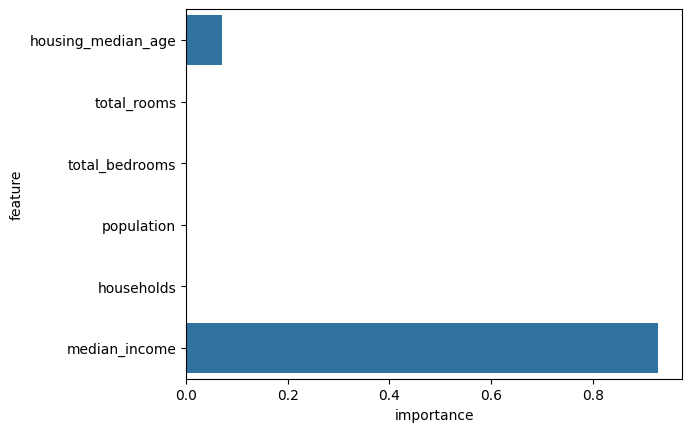

In [50]:
feature_importances = pd.DataFrame({'feature':list(x_train.columns),'importance':decisiontree.feature_importances_})
sns.barplot(x='importance',y='feature',data=feature_importances)
plt.show()

[Text(0.5, 0.875, 'median_income <= 4.12\ngini = 0.5\nsamples = 15324\nvalue = [7623, 7701]'),
 Text(0.25, 0.625, 'median_income <= 2.833\ngini = 0.432\nsamples = 9751\nvalue = [6678.0, 3073.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'median_income <= 2.384\ngini = 0.296\nsamples = 4905\nvalue = [4018.0, 887.0]'),
 Text(0.0625, 0.125, 'gini = 0.234\nsamples = 3157\nvalue = [2730, 427]'),
 Text(0.1875, 0.125, 'gini = 0.388\nsamples = 1748\nvalue = [1288, 460]'),
 Text(0.375, 0.375, 'housing_median_age <= 46.5\ngini = 0.495\nsamples = 4846\nvalue = [2660.0, 2186.0]'),
 Text(0.3125, 0.125, 'gini = 0.486\nsamples = 4338\nvalue = [2528, 1810]'),
 Text(0.4375, 0.125, 'gini = 0.385\nsamples = 508\nvalue = [132, 376]'),
 Text(0.75, 0.625, 'median_income <= 5.328\ngini = 0.282\nsamples = 5573\nvalue = [945, 4628]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'housing_median_age <= 18.5\ngini = 0.404\nsamples = 2949\nvalue = [830, 2119]'),
 Text(0.5625, 0.125, 'gini = 0.498\

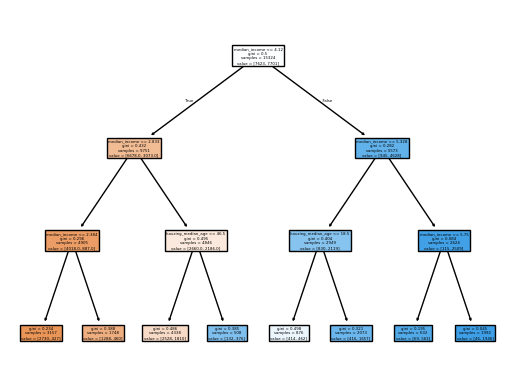

In [57]:
tree.plot_tree(decisiontree,feature_names=x_train.columns,filled=True)


**Random Forest classification**

In [58]:
random = RandomForestClassifier(n_estimators=100,random_state=42)
random.fit(x_train,y_train)
y_prediction_random = random.predict(x_test)

In [59]:
print("Accuracy:", accuracy_score(y_test,y_prediction_random))
print("Classification Report:\n",classification_report(y_test,y_prediction_random))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_prediction_random))

Accuracy: 0.8201213544724996
Classification Report:
               precision    recall  f1-score   support

       <180k       0.81      0.84      0.83      2594
       >180k       0.83      0.80      0.81      2515

    accuracy                           0.82      5109
   macro avg       0.82      0.82      0.82      5109
weighted avg       0.82      0.82      0.82      5109

Confusion Matrix:
 [[2179  415]
 [ 504 2011]]


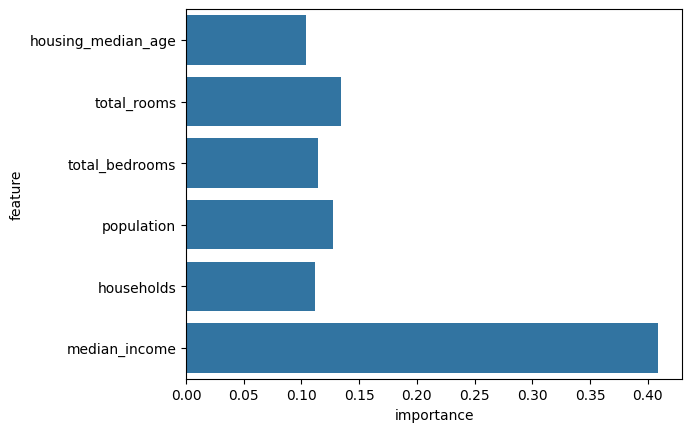

In [60]:
feature_importances_random = pd.DataFrame({'feature':list(x_train.columns),'importance':random.feature_importances_})
sns.barplot(x='importance',y='feature',data=feature_importances_random)
plt.show()


**Gradient Boosting Classification**

In [61]:
gradiant = GradientBoostingClassifier(n_estimators=100,random_state=42)
gradiant.fit(x_train,y_train)
y_prediction_gradiant = gradiant.predict(x_test)

In [62]:
print("Accuracy:", accuracy_score(y_test,y_prediction_gradiant))
print("Classification Report:\n",classification_report(y_test,y_prediction_gradiant))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_prediction_gradiant))


Accuracy: 0.809356038363672
Classification Report:
               precision    recall  f1-score   support

       <180k       0.80      0.84      0.82      2594
       >180k       0.82      0.78      0.80      2515

    accuracy                           0.81      5109
   macro avg       0.81      0.81      0.81      5109
weighted avg       0.81      0.81      0.81      5109

Confusion Matrix:
 [[2169  425]
 [ 549 1966]]


Conculsion: The accuracy of the classification models are:


*   Decision tree has a accuracy of 0.75
*   Random forest has a accuracy of 0.82


*   Gradient bossting classification has a accuracy of 0.8.
Therefore, the random forest has the highest accuracy and performed well among others.



